# Zadanie 6

Celem ćwiczenia jest implementacja algorytmu Q-learning.

Następnie należy stworzyć agenta rozwiązującego problem [Taxi](https://gymnasium.farama.org/environments/toy_text/taxi/). Problem dostępny jest w pakiecie **gym**.

Punktacja (max 8 pkt):
- Implementacja algorytmu Q-learning. [3 pkt]
- Eksperymenty dla różnych wartości hiperparametrów [2 pkt]
- Jakość kodu [1.5 pkt]
- Wnioski [1.5 pkt]


In [1]:
import numpy as np
import gym
import random
from matplotlib import pyplot as plt


random.seed(12)

In [2]:
class QLearningSolver:
    """Class containing the Q-learning algorithm that might be used for different discrete environments."""
    def __init__(self,
                 streets,
                 learning_rate: float = 0.1,
                 gamma: float = 0.9,  # discount factor
                 epsilon: float = 0.1,  # exploration
                 ):
        self.observation_space = streets.observation_space.n
        self.action_space = streets.action_space.n
        self.streets = streets
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.epsilon = epsilon
        self.q_table = np.zeros((self.observation_space, self.action_space))

    def __call__(self, state, action) -> int:
        """Return Q-value of given state and action."""
        return self.q_table[state, action]

    def update(self, state, action, reward, next_state) -> None:
        """Update Q-value of given state and action."""
        next_max_q = np.max(self.q_table[next_state])
        new_q = (1 - self.learning_rate) * self(state, action) + self.learning_rate * (reward + self.gamma * next_max_q)
        self.q_table[state, action] = new_q

    def get_best_action(self, state) -> int:
        """Return action that maximizes Q-value for a given state."""
        return np.argmax(self.q_table[state])

    def learn(self):
        done = False
        state = self.streets.reset()[0]
        trip_l=0
        while not done:
            if (random.uniform(0, 1) < self.epsilon):
                action = self.streets.action_space.sample()
            else:
                action = self.get_best_action(state)

            next_state, reward, done, x, info = self.streets.step(action)
            self.update(state, action, reward, next_state)
            state = next_state
            trip_l += 1
        return trip_l

    def run(self):
        done = False
        state = self.streets.reset()[0]
        trip_l = 0
        while not done:
            action = self.get_best_action(state)

            next_state, reward, done, x, info = self.streets.step(action)
            self.update(state, action, reward, next_state)
            state = next_state
            trip_l += 1
        return trip_l

# Eksperymenty

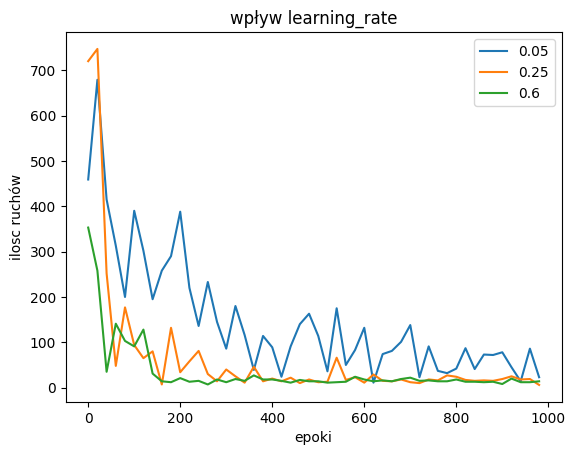

In [3]:
streets = gym.make("Taxi-v3").env
epochs = range(1000)

a1 = QLearningSolver(streets, 0.05, 0.9, 0.1)
a2 = QLearningSolver(streets, 0.25, 0.9, 0.1)
a3 = QLearningSolver(streets, 0.6, 0.9, 0.1)

aa1, aa2, aa3 = [], [], []

ile = 20

for i in epochs:
    a_l1 = a1.learn()
    a_l2 = a2.learn()
    a_l3 = a3.learn()
    if i%ile == 0:
        aa1.append(a_l1)
        aa2.append(a_l2)
        aa3.append(a_l3)
plt.plot(epochs[::ile], aa1)
plt.plot(epochs[::ile], aa2)
plt.plot(epochs[::ile], aa3)
plt.title('wpływ learning_rate')
plt.legend([f'{a1.learning_rate}', f'{a2.learning_rate}', f'{a3.learning_rate}'])
plt.xlabel('epoki')
plt.ylabel('ilosc ruchów')
plt.show()



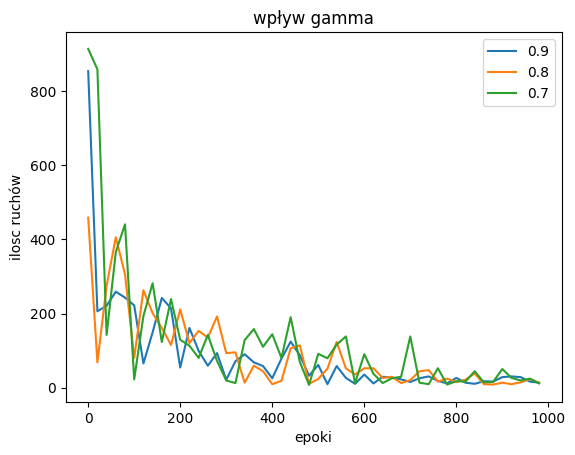

In [57]:
epochs = range(1000)
streets = gym.make("Taxi-v3").env
a1 = QLearningSolver(streets, 0.1, 0.9, 0.1)
a2 = QLearningSolver(streets, 0.1, 0.8, 0.1)
a3 = QLearningSolver(streets, 0.1, 0.7, 0.1)


aa1, aa2, aa3 = [], [], []

ile = 20

for i in epochs:
    a_l1 = a1.learn()
    a_l2 = a2.learn()
    a_l3 = a3.learn()
    if i%ile == 0:
        aa1.append(a_l1)
        aa2.append(a_l2)
        aa3.append(a_l3)
plt.plot(epochs[::ile], aa1)
plt.plot(epochs[::ile], aa2)
plt.plot(epochs[::ile], aa3)
plt.title('wpływ gamma')
plt.legend([f'{a1.gamma}', f'{a2.gamma}', f'{a3.gamma}'])
plt.xlabel('epoki')
plt.ylabel('ilosc ruchów')
plt.show()

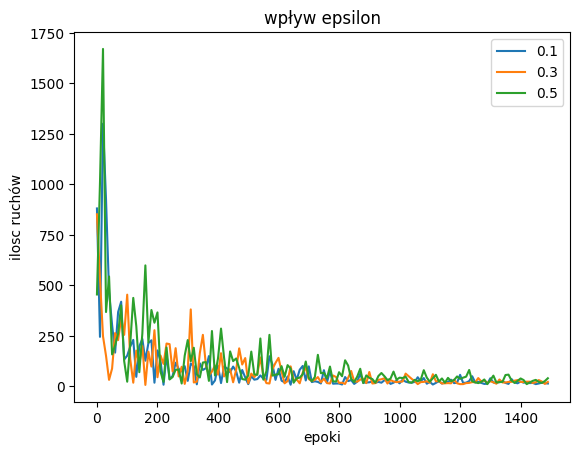

In [8]:
epochs = range(1500)
streets = gym.make("Taxi-v3").env
a1 = QLearningSolver(streets, 0.1, 0.8, 0.1)
a2 = QLearningSolver(streets, 0.1, 0.8, 0.3)
a3 = QLearningSolver(streets, 0.1, 0.8, 0.5)


aa1, aa2, aa3 = [], [], []

ile = 10

for i in epochs:
    a_l1 = a1.learn()
    a_l2 = a2.learn()
    a_l3 = a3.learn()
    if i%ile == 0:
        aa1.append(a_l1)
        aa2.append(a_l2)
        aa3.append(a_l3)
plt.plot(epochs[::ile], aa1)
plt.plot(epochs[::ile], aa2)
plt.plot(epochs[::ile], aa3)
plt.title('wpływ epsilon')
plt.legend([f'{a1.epsilon}', f'{a2.epsilon}', f'{a3.epsilon}'])
plt.xlabel('epoki')
plt.ylabel('ilosc ruchów')
plt.show()

In [6]:
streets = gym.make("Taxi-v3").env
a = QLearningSolver(streets)
epochs = range(2000)
t = []
for _ in epochs:
    t.append(a.learn())


a.streets = gym.make("Taxi-v3", render_mode="human").env
epochs = 100
while(epochs):
    print(a.run())
    epochs -= 1


10
14
12
8
7
15
13
13
13
14
13
18
10
9
16
16
11
13
11
16
13
20
19
15
10
15
20
6
16
16
14
13
11
15
16
16
17
15


KeyboardInterrupt: 

: 

# Wnioski

Wpływ learning rate: na wykresach widać że z mniejszym learning rate uczy się po prostu dłużej.
Ogólnie learning rate rozdziela jaki wpływ ma aktualna wartość stanu oraz przyszły stan + nagroda. Im większa wartość learning rate to więcej bierze oblicza od przyszłego stanu niż od aktualnego.

Wpływ gammy: zakres powinien być z zakresu ok (0.7 - 0.9) ale z wykresu wynika, że większego wpływu nie ma na ilość ruchów w zależności od kolejnej epoki (oczywiście dla tego problemu taxi).

Wpływ epsilon: dla większych epsilon taxi porusza się częściej losowo, więc na początku dla danej epoki (np 10) potrafi wykonać więcej ruchów zanim dowiezie pasażera do hotelu, ale z pozostałymi współczynnikami taki samymi to uczy się tak samo szybko.